# Putting it all together

In [1]:
univ_colnum = 10 #change

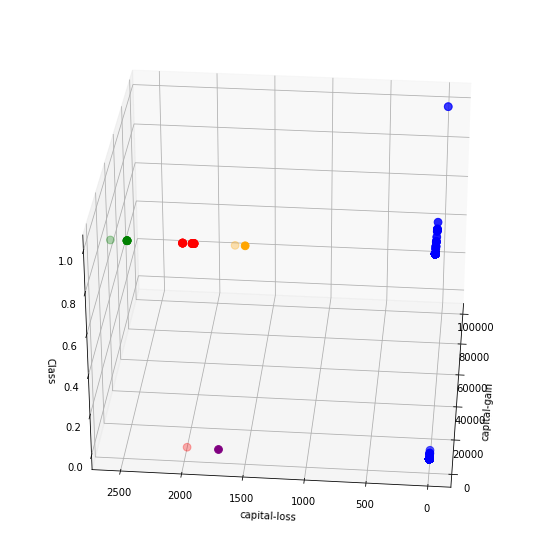

df_presentation:
     capital-gain  capital-loss  class  label  capital-gain  capital-loss  \
0              0             0      1      0             0             0   
1              0          2547      1      2             0          2547   
2              0             0      0      0             0             0   
3              0             0      0      0             0             0   
4              0             0      1      0             0             0   
5              0             0      1      0             0             0   
6              0             0      1      0             0             0   
7              0             0      0      0             0             0   
8              0             0      0      0             0             0   
9              0             0      1      0             0             0   
10             0             0      1      0             0             0   
11             0          1887      1      1             0          18

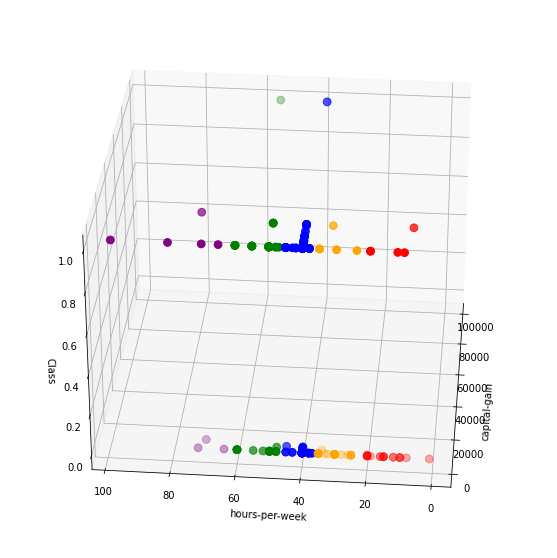

df_presentation:
     capital-gain  hours-per-week  class  label  capital-gain  hours-per-week  \
0              0              40      1      0             0              40   
1              0              40      1      0             0              40   
2              0              40      0      0             0              40   
3              0              10      0      1             0              10   
4              0              43      1      0             0              43   
5              0              40      1      0             0              40   
6              0              40      1      0             0              40   
7              0               1      0      1             0               1   
8              0              40      0      0             0              40   
9              0              40      1      0             0              40   
10             0              40      1      0             0              40   
11             0      

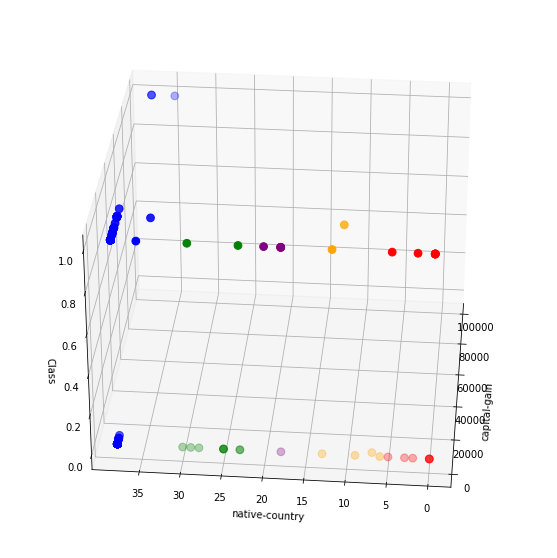

df_presentation:
     capital-gain native-country  class  label  capital-gain  \
0              0             38      1      0             0   
1              0             38      1      0             0   
2              0             38      0      0             0   
3              0             38      0      0             0   
4              0             38      1      0             0   
5              0             38      1      0             0   
6              0             38      1      0             0   
7              0              3      0      1             0   
8              0             38      0      0             0   
9              0             18      1      4             0   
10             0             18      1      4             0   
11             0             38      1      0             0   
12             0             38      0      0             0   
13             0             38      0      0             0   
14             0              6      

c:\users\malco\appdata\local\programs\python\python36\lib\site-packages\sklearn\cluster\_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


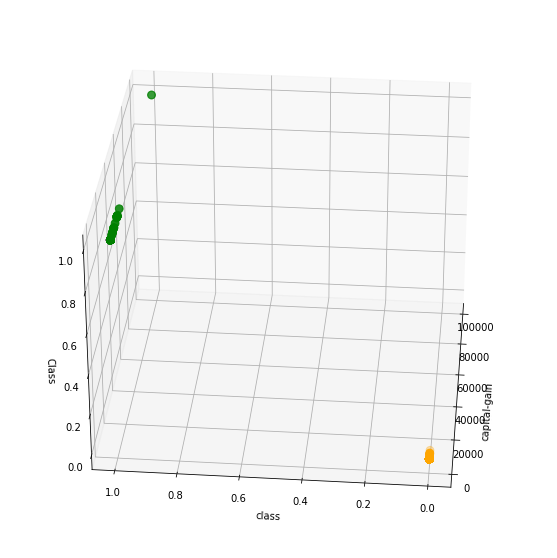

df_presentation:
     capital-gain  class  class  label  capital-gain  class   color
0              0      1      1      2             0      1   Green
1              0      1      1      2             0      1   Green
2              0      0      0      3             0      0  Orange
3              0      0      0      3             0      0  Orange
4              0      1      1      2             0      1   Green
5              0      1      1      2             0      1   Green
6              0      1      1      2             0      1   Green
7              0      0      0      3             0      0  Orange
8              0      0      0      3             0      0  Orange
9              0      1      1      2             0      1   Green
10             0      1      1      2             0      1   Green
11             0      1      1      2             0      1   Green
12             0      0      0      3             0      0  Orange
13             0      0      0      3       

IndexError: list index out of range

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import set_option
pd.set_option('max_rows',100)

df = pd.read_csv('Mall_Customers.csv')
mainpath = 'C:/Users/malco/aaPythonPersonalNotebook/DBS Data Scientist Treasury and Market Operations/dataset/'

#adult_data_RenameCol_MinMax_LE_5050
df_orig = pd.read_csv(mainpath + 'adult_data.csv',index_col = 0) #orig

dfy_explanation = pd.read_csv(mainpath + 'adult_data_Binary5050.csv',index_col = 0)
dfy = pd.read_csv(mainpath + 'adult_data_Binary5050_LE.csv',index_col = 0)
dfy_class = dfy['class']

dfy_explanation
colname_final_all = dfy_explanation.columns.to_list()
colname_final_all

desired_col1 = colname_final_all[univ_colnum] #age
for univ_count in range(univ_colnum+1, len(dfy_explanation)):
    desired_col2 = colname_final_all[univ_count] #workclass.. fnlwgt.. native-country

    dfx = dfy[[desired_col1, desired_col2]] 
    dfx.reset_index(drop = True,inplace= True)
    dfy_class.reset_index(drop = True,inplace= True)

    df = pd.concat([dfx,dfy_class],axis=1)

    df.columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
    df.dropna(inplace=  True, axis=0)
    df = df[:300]

    km = KMeans(n_clusters=5)
    clusters = km.fit_predict(df.iloc[:,1:])
    df["label"] = clusters

    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
    ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
    ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
    ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
    ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)

    plt.xlabel(desired_col1)
    plt.ylabel(desired_col2)
    ax.set_zlabel('Class')

    ax.view_init(30, 185)#30, 185
    plt.show()

    df_temp = df.copy()
    df_temp.columns = [desired_col1, desired_col2, 'class', 'label']
    df_temp

    dfy_explanation_temp = dfy_explanation[[desired_col1, desired_col2]][:300]
    dfy_explanation_temp.reset_index(drop = True, inplace= True)
    dfy_explanation_temp
    df_presentation = pd.concat([df_temp, dfy_explanation_temp],axis=1)
    df_presentation

    df_presentation
    def get_label_color(x):
        if x == 0:
            col = 'Blue'
        if x == 1:
            col = 'Red'
        if x == 2:
            col = 'Green'
        if x == 3:
            col = 'Orange'
        if x == 4:
            col = 'Purple'
        return col

    df_presentation['color'] = df_presentation['label']
    df_presentation
    df_presentation['color'] = df_presentation['color'] .apply(lambda x: get_label_color(x))
    print("df_presentation:\n",df_presentation.head(50))
